## Figure 1

In [27]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
##pvalues: 200
np.random.seed(123)
KOs = np.random.uniform(0, 0.05, (50,))
KOs = np.append(KOs, np.random.uniform(0.05, 1, (170,)))
index = np.arange(200)
np.random.seed(1024)
np.random.shuffle(index)
KOs = KOs[index]
y = np.where(KOs<0.05)
y = np.array(y[0])
print(y)

[  0   4   6  12  14  24  33  34  40  42  43  48  50  55  60  61  62  63
  71  76  77  79  90  94  96 100 102 113 115 119 126 128 130 147 151 157
 164 165 170 172 174 175 176 177 178 180 184 186 188 192]


In [123]:
##ten pathways: number of KOs in each pathway
np.random.seed(6)
nKO = np.random.randint(20, 50, 10)
print(nKO)

[30 29 23 40 30 33 35 30 36 45]


In [153]:
##ids of KOs in each pathway
KO_id = []
y.tolist()
np.random.seed(123)
for i in nKO[:-1]:
    if i==nKO[3]:
        ids = np.random.choice(list(set(list(range(0, 200))).difference(set(y))), i, replace=False)
    else:
        ids = np.random.choice(list(range(0, 200)), i, replace=False)
    #print(np.sort(ids))
    KO_id.extend(list(ids))
diff_id = set(list(range(0, 200))).difference(set(KO_id))
diff_id = list(diff_id)
print(len(diff_id))
diff_id.extend(list(np.random.choice(list(set(list(range(0, 200))).difference(set(diff_id))), 
                                     nKO[-1]-len(diff_id), 
                                     replace=False)))
KO_id.extend(diff_id)
print(len(KO_id))

44
331


In [154]:
##pvalues of KOs in each pathway
pvalues = KOs[KO_id]
p_cat = []
for value in pvalues:
    if (value<0.05):
        cat = "<0.05"
    elif(value<0.1):
        cat = "[0.05, 0.1)"
    elif(value<0.2):
        cat = "[0.1, 0.2)" 
    elif(value<0.3): 
        cat = "[0.2, 0.3)" 
    elif(value<0.4):
        cat = "[0.3, 0.4)"
    elif(value<=0.5):
        cat = "[0.4, 0.5]" 
    else:
        cat = ">0.5"
    #print(cat)
    p_cat.extend([cat])
print(len(pvalues))
print(len(p_cat))

331
331


In [155]:
df = pd.DataFrame(np.c_[np.repeat(np.array(range(1,11)), nKO).astype("int"),
                        np.array(KO_id).astype("int"), np.array(pvalues), np.array(p_cat)],
                 columns=["pathway", "KO_id", "pvalues", "p_cat"])
print(df)

    pathway KO_id               pvalues       p_cat
0         1    50  0.015613061148623264       <0.05
1         1   127   0.24725406813650824  [0.2, 0.3)
2         1    37    0.9353355406728442        >0.5
3         1   149    0.8376570027767959        >0.5
4         1    19    0.5678146061431417        >0.5
..      ...   ...                   ...         ...
326      10   106    0.9843455287433778        >0.5
327      10   111    0.7318696841655797        >0.5
328      10   118    0.5766640872318834        >0.5
329      10   119  0.012522768269825336       <0.05
330      10   105    0.8502253157392444        >0.5

[331 rows x 4 columns]


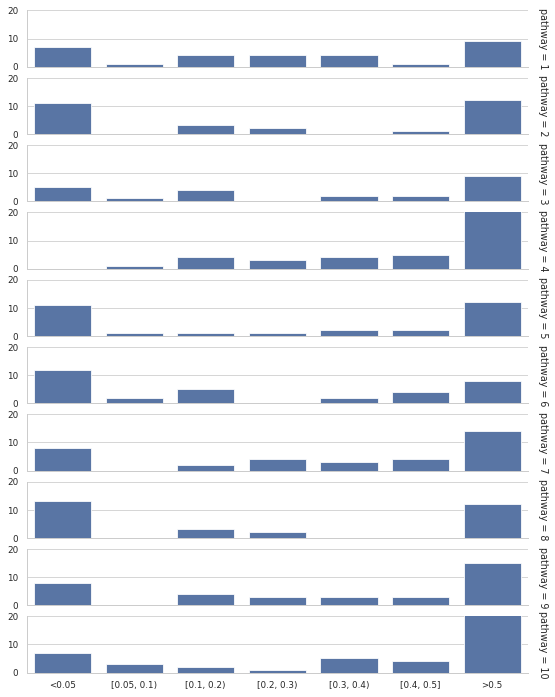

In [156]:
##Not desired!!
sns.set_theme(context="paper", style="whitegrid")
g = sns.FacetGrid(df, row="pathway", height=1, aspect=8, margin_titles=True)
g.map_dataframe(sns.countplot, x="p_cat", 
                order = ["<0.05", "[0.05, 0.1)", "[0.1, 0.2)", "[0.2, 0.3)", "[0.3, 0.4)", "[0.4, 0.5]", ">0.5"])
g.figure.subplots_adjust(hspace=.2)
g.set(ylim=(0, 20), ylabel="", xlabel="", yticks=[0,10,20])
#g = sns.catplot(x="p_cat", row="pathway", data=df, kind="count", height=1.5, aspect=4)

### The output figure is not in desired format. Save the data and create figure 1 use R.

In [157]:
##save data to csv file
df.to_csv('data1.csv',index=False,header=True)